## Vectorization

In [1]:
import pandas as pd

In [2]:
# Importing the corpus that was already preprocessed in my EDA
corpus = pd.read_csv('finance_tweets_train.csv').drop(columns = ['Unnamed: 0'])
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9534 non-null   object
dtypes: object(1)
memory usage: 74.6+ KB


In [3]:
# Importing train data set
# Will need this to make sure the indexes are the same between the target ang feature data frames
Train_df = pd.read_csv('sent_train.csv')

In [4]:
# List of index values that need to be dropped from target data frame
drop_list = [3943, 4440, 4681, 4682, 4683, 4854, 8535, 8762, 8763]

In [5]:
# Importing the package for the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# Instantiating the CounteVectorizer
# Fit_transforming the text and then creating a dataframe with the transformed text
vec = CountVectorizer(max_df = .85)
X_train = vec.fit_transform(corpus['text'])
countvec_df = pd.DataFrame(X_train.toarray(), columns=vec.get_feature_names())

In [7]:
# Making sure the label column index matches the corpus index using the drop list earlier
# Then concatenating the two dataframes
y_tar = Train_df['label'].drop(drop_list).reset_index().drop(columns =['index'])
z = pd.concat([countvec_df, y_tar],1)

In [8]:
# Creating dataframes that sort by the most common words for each label
most_common_by_bearish = z.groupby('label').sum().T.sort_values(by = 0, ascending = False)
most_common_by_bullish = z.groupby('label').sum().T.sort_values(by = 1, ascending = False)
most_common_by_nuetral = z.groupby('label').sum().T.sort_values(by = 2, ascending = False)

In [9]:
# Printing out the words and counts that are most common for each respective label
print(most_common_by_bearish[0][0:6].values)
print(most_common_by_bearish.index[0:6])
print(most_common_by_bullish[1][0:6].values)
print(most_common_by_bullish.index[0:6])
print(most_common_by_nuetral[2][0:6].values)
print(most_common_by_nuetral.index[0:6])

[210 116 102  98  98  87]
Index(['stock', 'miss', 'cut', 'market', 'price', 'low'], dtype='object')
[367 195 166 158 145 137]
Index(['stock', 'beat', 'market', 'price', 'share', 'high'], dtype='object')
[681 321 318 308 287 273]
Index(['stock', 'result', 'say', 'report', 'new', 'market'], dtype='object')


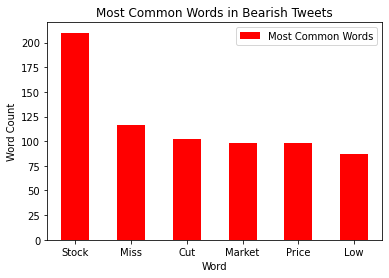

In [10]:
# Creating a bar chart for most common words in Bearish Tweets
import matplotlib.pyplot as plt
index = ['Stock', 'Miss', 'Cut', 'Market', 'Price', 'Low']
word_count = [210, 116, 102,  98,  98,  87]
top_6_bearish_df = pd.DataFrame({'Most Common Words': word_count}, index=index)
ax = top_6_bearish_df.plot(kind = 'bar', rot = 0, color = 'red')
ax.set_title('Most Common Words in Bearish Tweets')
ax.set_ylabel('Word Count')
ax.set_xlabel('Word');

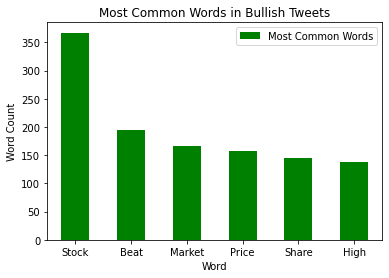

In [11]:
# Creating a bar chart for most common words in Bullish Tweets
index = ['Stock', 'Beat', 'Market', 'Price', 'Share', 'High']
word_count = [367, 195, 166, 158, 145, 137]
top_6_bullish_df = pd.DataFrame({'Most Common Words': word_count}, index=index)
ax = top_6_bullish_df.plot(kind = 'bar', rot = 0, color = 'green')
ax.set_title('Most Common Words in Bullish Tweets')
ax.set_ylabel('Word Count')
ax.set_xlabel('Word');

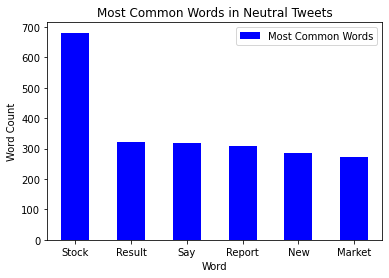

In [12]:
# Creating a bar chart for most common words in neutral Tweets
index = ['Stock', 'Result', 'Say', 'Report', 'New', 'Market']
word_count = [681, 321, 318, 308, 287, 273]
top_6_bullish_df = pd.DataFrame({'Most Common Words': word_count}, index=index)
ax = top_6_bullish_df.plot(kind = 'bar', rot = 0, color = 'blue')
ax.set_title('Most Common Words in Neutral Tweets')
ax.set_ylabel('Word Count')
ax.set_xlabel('Word');

## Topic Modeling

In [13]:
# Importing packages
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

In [14]:
# Instatiating NMF and fitting it to my X_train
topic_model = NMF(n_components = 4)
topic_model.fit(X_train)

NMF(n_components=4)

In [15]:
H = topic_model.transform(X_train)
W = topic_model.components_

In [17]:
# Creating a for loop to give me top 10 words for 4 topics
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vec.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['good', 'gain', 'energy', 'update', 'raise', 'buy', 'target', 'price', 'marketscreener', 'stock']


THE TOP 10 WORDS FOR TOPIC #1
['edited', 'edit', 'report', 'gmt', 'conference', 'result', 'presentation', 'transcript', 'call', 'earnings']


THE TOP 10 WORDS FOR TOPIC #2
['rev', 'estimate', 'report', 'consensus', 'analyst', 'share', 'miss', 'eps', 'revenue', 'beat']


THE TOP 10 WORDS FOR TOPIC #3
['china', 'high', 'share', 'deal', 'economy', 'trade', 'new', 'update', 'say', 'market']




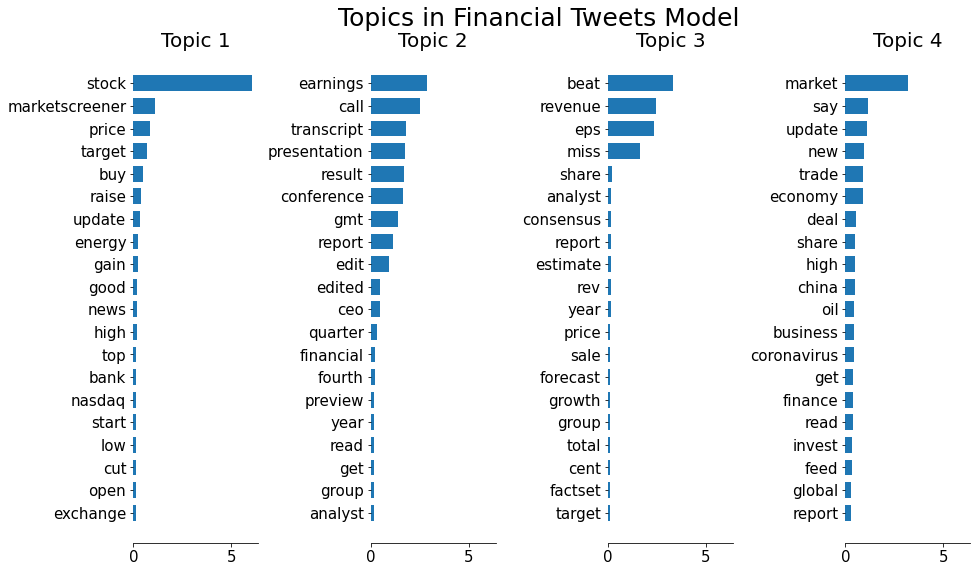

In [31]:
# Visualizing the weigths of words in each of the topics
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vec.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in Financial Tweets Model")

In [19]:
# Creating a dictionary with names for each topic
# creating a function that deploys the weights of each topic for a specific tweet
topic_name_dict = {0: 'Stocks', 1: 'Earnings Report', 2: 'Company/Stock Evaluation', 3: 'Market Info'}
import seaborn as sns
def tweet_topbreakdown(locator):

    print(corpus.loc[locator].text)
    int_index = corpus.index.get_loc(locator)

    topic_keys = topic_name_dict.values()
    zipped_tuple = list(zip(topic_keys, list(H[int_index,:])))

    topic_breakdown = pd.DataFrame(zipped_tuple, columns = ['Topic', 'Weight']).set_index(['Topic'])
    topic_breakdown['Normalized weight'] = topic_breakdown['Weight']/topic_breakdown['Weight'].sum()

    sns.barplot(y = topic_breakdown.index, x = 'Normalized weight', data = topic_breakdown)
    plt.title("Distribution of topics for tweet no. " + str(locator))
    plt.show()

    return topic_breakdown

bynd jpmorgan reel expectation meat


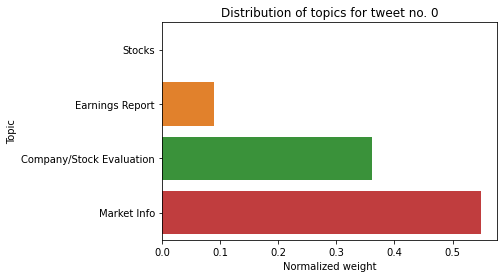

fti technipfmc downgrade berenberg call top pick deutsche bank


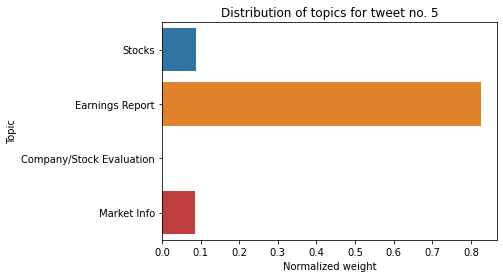

alphabet facebook price target cut barclays weak ad outlook


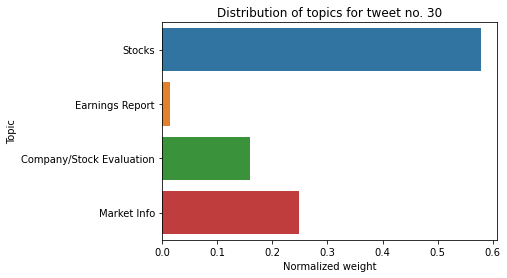

canada goose stock price target cut cfra


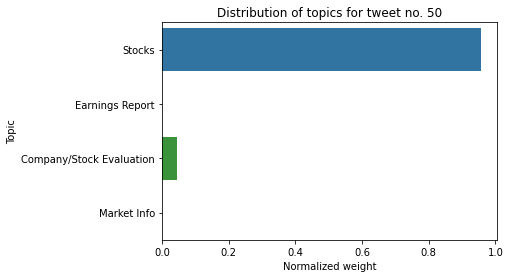

napco security stock price target cut imperial capital


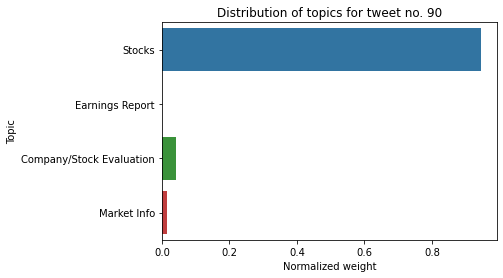

In [40]:
# passing in a list of random tweets into the definition and visualizing
tweet_loc_list = [0,5, 30, 50, 90]
g = list(map(tweet_topbreakdown, tweet_loc_list))

In [21]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [22]:
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

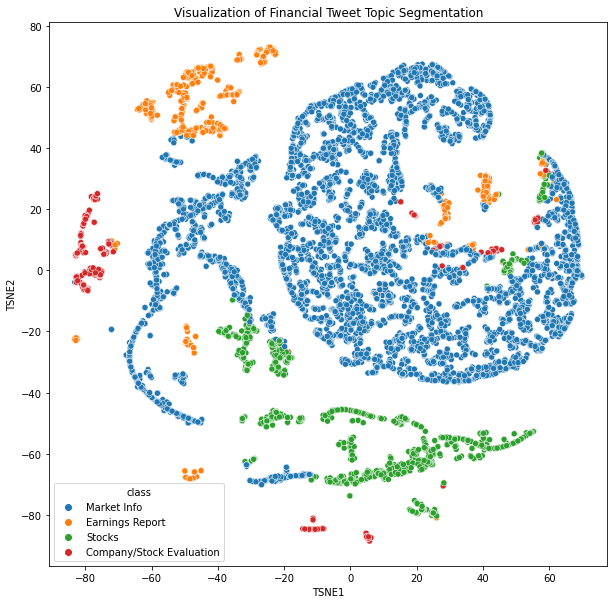

In [23]:
# Visualizing Segmentation
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title('Visualization of Financial Tweet Topic Segmentation')
plt.show()

In [27]:
# Creating a data frame that shows the weights associated with each tweet
H_repres_norm = pd.DataFrame(H, columns = topic_name_dict.values(), index = countvec_df.index)
H_repres_norm = H_repres_norm.divide(H_repres_norm.sum(axis=1), axis=0)
H_repres_norm.head()

,Stocks,Earnings Report,Company/Stock Evaluation,Market Info
0,0.000000,0.089837,0.361457,0.548706
1,0.190372,0.000000,0.000000,0.809628
2,0.133246,0.047039,0.138625,0.681090
3,0.200702,0.000000,0.054305,0.744994
4,0.208812,0.000000,0.067550,0.723638


In [39]:
# joining dataframes
tweets_topics_df = Train_df.join(H_repres_norm).dropna()
tweets_topics_df.head(30)

,text,label,Stocks,Earnings Report,Company/Stock Evaluation,Market Info
0,$BYND - JPMorgan reels in expectations on Beyo...,0,0.000000,0.089837,0.361457,0.548706
1,$CCL $RCL - Nomura points to bookings weakness...,0,0.190372,0.000000,0.000000,0.809628
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,0.133246,0.047039,0.138625,0.681090
3,$ESS: BTIG Research cuts to Neutral https://t....,0,0.200702,0.000000,0.054305,0.744994
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,0.208812,0.000000,0.067550,0.723638
5,$FTI - TechnipFMC downgraded at Berenberg but ...,0,0.088728,0.825313,0.000000,0.085958
6,$GM - GM loses a bull https://t.co/tdUfG5HbXy,0,0.000000,0.000000,0.000000,1.000000
7,$GM: Deutsche Bank cuts to Hold https://t.co/7...,0,0.229072,0.064985,0.037842,0.668101
8,$GTT: Cowen cuts to Market Perform,0,0.000000,0.000000,0.000000,1.000000
9,$HNHAF $HNHPD $AAPL - Trendforce cuts iPhone e...,0,0.113341,0.050480,0.259231,0.576948


In [37]:
H_repres_norm.to_csv('topic_modeling.csv')